In [1]:
import pandas as pd
df=pd.read_csv("cleaned_stock_data.csv",parse_dates=["Date"])

In [2]:
df.set_index("Date",inplace=True)
df=df[['Open','High','Low','Close','Volume']]

In [3]:
print(df.head())
print(df.info())
print(df.describe())

                 Open       High        Low      Close     Volume
Date                                                             
2020-01-02  71.627092  72.681289  71.373218  72.620842  135480400
2020-01-03  71.847125  72.676454  71.689965  71.914825  146322800
2020-01-06  71.034709  72.526533  70.783248  72.487846  118387200
2020-01-07  72.497522  72.753816  71.926907  72.146935  108872000
2020-01-08  71.849525  73.609737  71.849525  73.307503  132079200
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 505 entries, 2020-01-02 to 2021-12-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    505 non-null    float64
 1   High    505 non-null    float64
 2   Low     505 non-null    float64
 3   Close   505 non-null    float64
 4   Volume  505 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 23.7 KB
None
             Open        High         Low       Close        Volume
count  505.000000  505.000000  5

In [4]:
#missing and duplicated
print("Missing values:\n",df.isnull().sum())
print("Duplicate rows:",df.duplicated().sum())

Missing values:
 Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64
Duplicate rows: 0


In [5]:
# time range and frequency
print("Start date:",df.index.min())
print("End date:",df.index.max())
print("Total records:",len(df))
print("Date frequency:",pd.infer_freq(df.index))

Start date: 2020-01-02 00:00:00
End date: 2021-12-31 00:00:00
Total records: 505
Date frequency: None


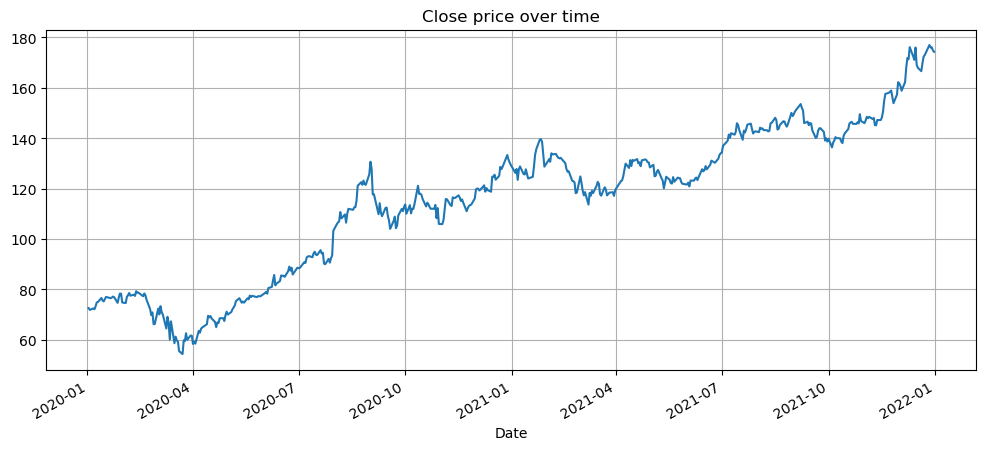

In [6]:
# visualize the trend
import matplotlib.pyplot as plt
df['Close'].plot(figsize=(12,5),title="Close price over time")
plt.grid(True);plt.show()

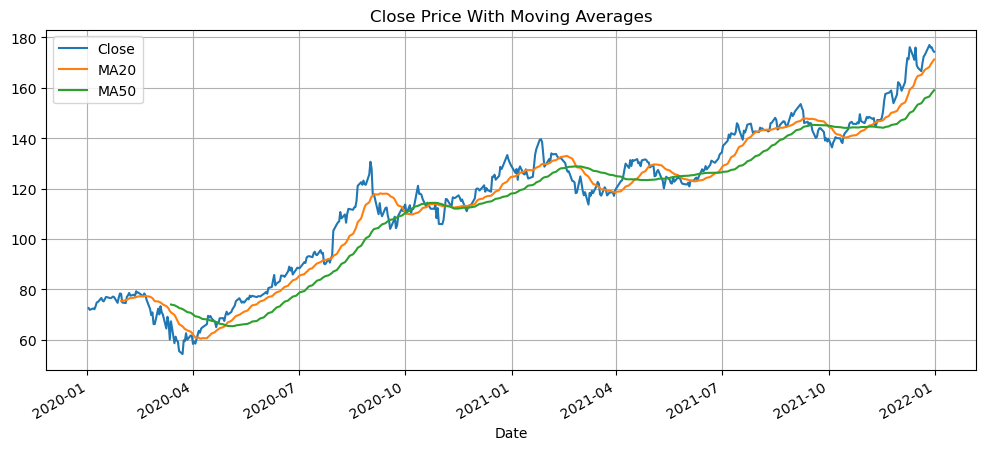

In [7]:
# moving averages of last 20 and 50 days
df['MA20']= df['Close'].rolling(window=20).mean()
df['MA50']= df['Close'].rolling(window=50).mean()
df[['Close','MA20','MA50']].plot(figsize=(12,5),title="Close Price With Moving Averages")
plt.grid(True);
plt.show()

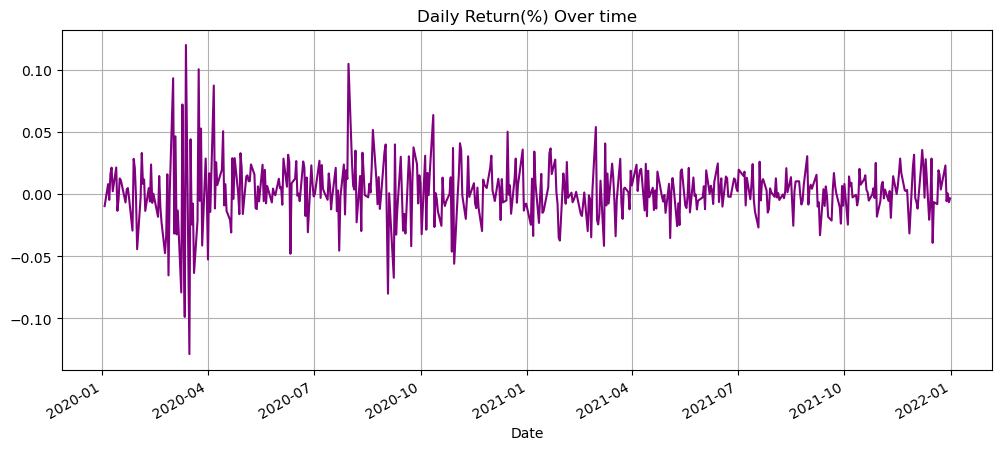

In [11]:
# daily return (means how much stock prices are changed according to the previous day)
df['Daily_Return'] = df['Close'].pct_change()
df['Daily_Return'].plot(figsize=(12,5),title="Daily Return(%) Over time",color='purple')
plt.grid(True);
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


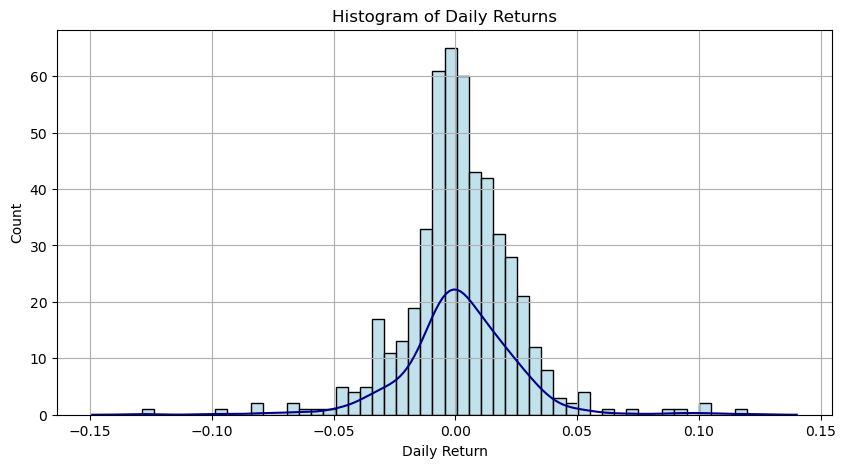

In [18]:
# Daily Return distribution - visualizing  how the daily percentage changes in stock prices are spread out overtime- whether most changes are small ,big,positive,negative
import seaborn as sns
plt.figure(figsize=(10,5))
sns.histplot(df['Daily_Return'].dropna(),bins=50,color='lightblue')
sns.kdeplot(df['Daily_Return'].dropna(),color='darkblue')
plt.title("Histogram of Daily Returns")
plt.xlabel("Daily Return")
plt.grid(True)
plt.show()

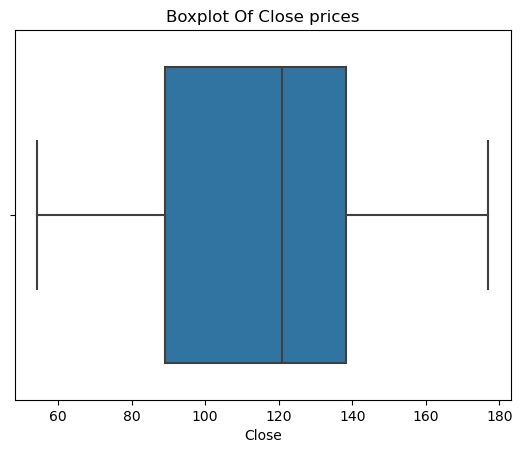

In [19]:
#boxplot - outlier detection
sns.boxplot(x=df['Close'])
plt.title("Boxplot Of Close prices")
plt.show()

Outliers detected: 0


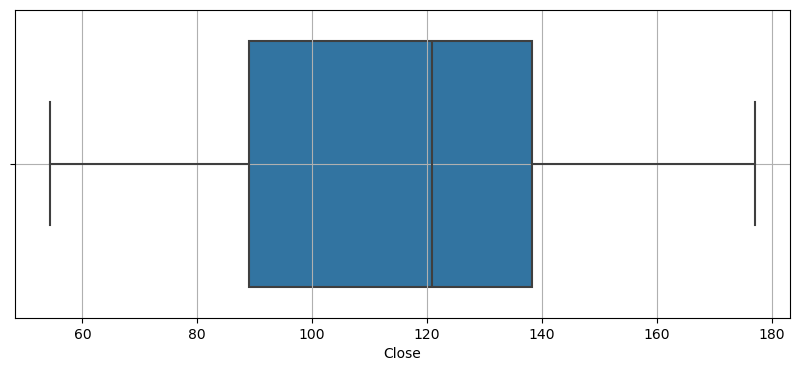

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

Q1 = df['Close'].quantile(0.25)
Q3 = df['Close'].quantile(0.75)
IQR = Q3 - Q1

# Correct boolean mask using bitwise OR
Outliers = df[(df['Close'] < Q1 - 1.5 * IQR) | (df['Close'] > Q3 + 1.5 * IQR)]

print(f"Outliers detected: {len(Outliers)}")

plt.figure(figsize=(10, 4))
sns.boxplot(x=df['Close'])
plt.grid(True)
plt.show()


In [24]:
print(df['Close'].dtype)
print(df['Close'].head())

float64
Date
2020-01-02    72.620842
2020-01-03    71.914825
2020-01-06    72.487846
2020-01-07    72.146935
2020-01-08    73.307503
Name: Close, dtype: float64


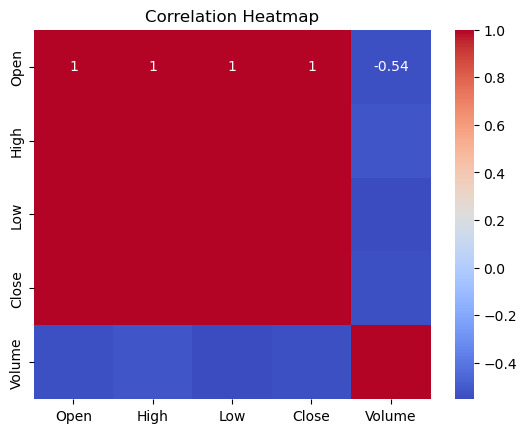

In [27]:
sns.heatmap(df[['Open','High','Low','Close','Volume']].corr(),annot=True,cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()